<a href="https://colab.research.google.com/github/padmashree1995/march-1-OIBSIP/blob/main/Sales_Prediction_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
dataset = pd.read_csv("/content/sample_data/Advertising.csv")
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
dataset.duplicated().sum()

0

In [44]:
dataset.isnull().values.any()

False

In [10]:
dataset.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [15]:
dataset.shape

(200, 4)

In [12]:
dataset=dataset.drop(columns=["Unnamed: 0"])

In [32]:
dataset.size

800

In [53]:
dataset.count

<bound method DataFrame.count of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [56]:
sales1 = dataset['Sales']

In [62]:
data = dataset[['TV', 'Radio', 'Newspaper' , 'Sales']]

In [63]:
data.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

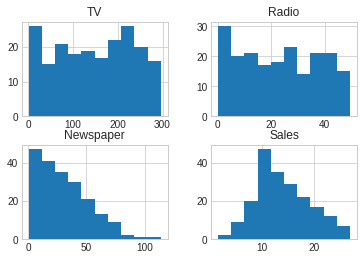

In [45]:
dataset.hist(bins=10)

<AxesSubplot:>

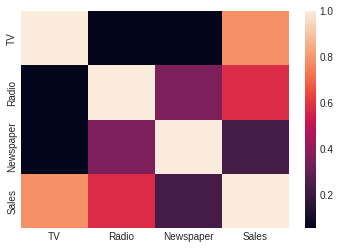

In [54]:
import seaborn as sns
corr1 = dataset.corr()                             #importing seaborn model for plotting graph
sns.heatmap(corr1)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

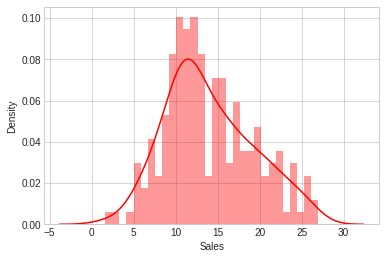

In [47]:
import matplotlib.pyplot as plt
sns.distplot(dataset.Sales,bins=30,color="red",hist=True)

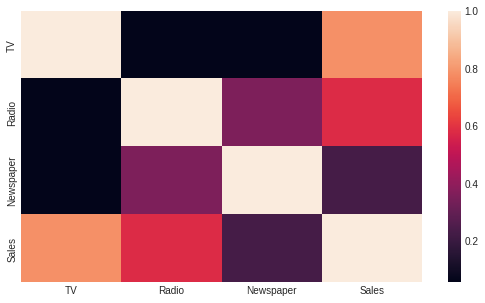

In [55]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9, 5))
sns.heatmap(dataset.corr())
plt.show()

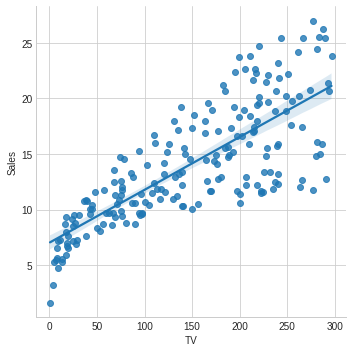

In [31]:
import matplotlib.pyplot as plt
sns.lmplot(x='TV', y='Sales', data=dataset)

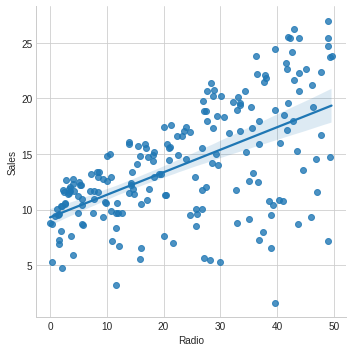

In [33]:
import matplotlib.pyplot as plt
sns.lmplot(x='Radio', y='Sales', data=dataset)

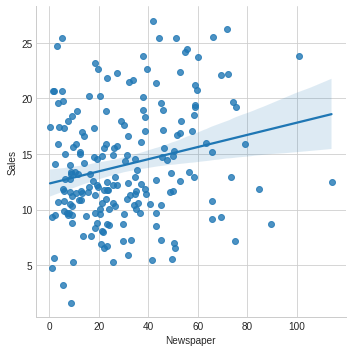

In [34]:
import matplotlib.pyplot as plt
sns.lmplot(x='Newspaper', y='Sales', data=dataset)

In [17]:
x=dataset.iloc[:,0:-1]

In [18]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [21]:
y=dataset.iloc[:,1]

In [22]:
y

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64

Spliting the train and test

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
x_train

array([[116. ,   7.7,  23.1],
       [177. ,   9.3,   6.4],
       [ 43.1,  26.7,  35.1],
       [ 62.3,  12.6,  18.3],
       [224. ,   2.4,  15.6],
       [ 38.2,   3.7,  13.8],
       [ 70.6,  16. ,  40.8],
       [147.3,  23.9,  19.1],
       [104.6,   5.7,  34.4],
       [ 76.3,  27.5,  16. ],
       [ 78.2,  46.8,  34.5],
       [168.4,   7.1,  12.8],
       [  8.7,  48.9,  75. ],
       [  7.8,  38.9,  50.6],
       [ 76.4,   0.8,  14.8],
       [129.4,   5.7,  31.3],
       [ 73.4,  17. ,  12.9],
       [289.7,  42.3,  51.2],
       [ 19.6,  20.1,  17. ],
       [197.6,   3.5,   5.9],
       [284.3,  10.6,   6.4],
       [184.9,  21. ,  22. ],
       [112.9,  17.4,  38.6],
       [ 23.8,  35.1,  65.9],
       [290.7,   4.1,   8.5],
       [ 19.4,  16. ,  22.3],
       [293.6,  27.7,   1.8],
       [ 18.7,  12.1,  23.4],
       [134.3,   4.9,   9.3],
       [ 25.6,  39. ,   9.3],
       [100.4,   9.6,   3.6],
       [ 80.2,   0. ,   9.2],
       [188.4,  18.1,  25.6],
       [17

In [28]:
y_train

array([11. , 12.8, 10.1,  9.7, 11.6,  7.6, 10.5, 14.6, 10.4, 12. , 14.6,
       11.7,  7.2,  6.6,  9.4, 11. , 10.9, 25.4,  7.6, 11.7, 15. , 15.5,
       11.9,  9.2, 12.8,  6.6, 20.7,  6.7, 11.2,  9.5, 10.7,  8.8, 14.9,
       17.1, 15.9, 15.9, 15. , 20.7, 11.7, 21.8,  9.3, 14.2, 10.6, 17.3,
        9.9, 15.2, 13.3, 25.4, 10.8, 24.2,  5.6, 19.2, 23.8, 17.4, 17.4,
       17.3, 12.9, 11.8, 15.9, 15.5, 12.9,  9.6, 20.1, 10.3, 19.8, 11.4,
        8.6, 15.7, 14.1, 13.2,  8. , 22.1, 25.5, 19. , 18.3, 15.2, 18. ,
        8.5, 18. , 18.9, 16.6,  5.3,  3.2, 15.3, 12. , 15.5, 17.6, 25.4,
       12.3, 21.5, 17.1, 23.2, 11.5, 15.6, 12.9,  9.6, 18.5, 19.2, 21.2,
       19.6, 10.5, 11.8, 22.6,  9.7, 11.8,  9.5, 13.2, 13.4,  7.3, 13.6,
       20.2, 12.2, 16.7,  4.8,  9.7, 18.4, 14.5, 12.7, 24.4,  8.8, 27. ,
       10.8, 12.2, 26.2, 14. , 20.2,  8.7, 11.4,  9.7, 23.8, 14.8, 12.9,
       12.5, 13.2, 14.4,  5.9,  9.7, 14.7, 10.1, 19.6, 10.4, 22.6, 10.1,
        1.6, 11.6, 14.7, 17.2, 12.2, 16. , 17. ,  7

In [29]:
x_test

array([[163.3,  31.6,  52.9],
       [195.4,  47.7,  52.9],
       [292.9,  28.3,  43.2],
       [ 11.7,  36.9,  45.2],
       [220.3,  49. ,   3.2],
       [ 75.1,  35. ,  52.7],
       [216.8,  43.9,  27.2],
       [ 50. ,  11.6,  18.4],
       [222.4,   3.4,  13.1],
       [175.1,  22.5,  31.5],
       [ 31.5,  24.6,   2.2],
       [ 56.2,   5.7,  29.7],
       [234.5,   3.4,  84.8],
       [  5.4,  29.9,   9.4],
       [139.5,   2.1,  26.6],
       [170.2,   7.8,  35.2],
       [  7.3,  28.1,  41.4],
       [197.6,  23.3,  14.2],
       [ 75.3,  20.3,  32.5],
       [237.4,  27.5,  11. ],
       [229.5,  32.3,  74.2],
       [ 67.8,  36.6, 114. ],
       [ 38. ,  40.3,  11.9],
       [250.9,  36.5,  72.3],
       [ 69. ,   9.3,   0.9],
       [ 53.5,   2. ,  21.4],
       [213.5,  43. ,  33.8],
       [139.3,  14.5,  10.2],
       [ 87.2,  11.8,  25.9],
       [  8.4,  27.2,   2.1],
       [199.8,   2.6,  21.2],
       [ 69.2,  20.5,  18.3],
       [198.9,  49.4,  60. ],
       [ 1

In [30]:
y_test

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 11.5, 14.9,  9.5,
        8.7, 11.9,  5.3, 10.3, 11.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2,  9.3,  8.1, 21.7, 13.4, 10.6,  5.7, 10.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9])

Model Evaluation

Evaluating the linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [40]:
ypred = model.predict(x_test)

In [41]:
data = pd.DataFrame(data={"Predicted Sales": ypred.flatten()})

In [42]:
data

,Predicted Sales
0,16.408024
1,20.889882
2,21.553843
3,10.608503
4,22.112373
5,13.105592
6,21.057192
7,7.461010
8,13.606346
9,15.155070


In [65]:
def predict_sales_value(tv_ads_value):
    return 7.0326 + (0.047537 * tv_ads_value)

In [67]:
predict_sales_value(123.1)

12.884404700000001

In [68]:
predict_sales_value(180)

15.589260000000001

In [69]:
def predict_sales_value(radio_ads_value):
    return 6.1326 + (0.057537 * radio_ads_value)

In [70]:
predict_sales_value(90.1)

11.316683699999999

In [71]:
predict_sales_value(100)

11.886299999999999

In [72]:
def predict_sales_value(Newspaper_ads_value):
    return 0.3214 + (0.123456* Newspaper_ads_value)

In [73]:
predict_sales_value(65.1)

8.3583856

In [74]:
predict_sales_value(30)

4.02508

In [75]:
def predict_sales_value(Sales_ads_value):
    return 2.3214 + (1.02354* Sales_ads_value)

In [76]:
predict_sales_value(70.9)

74.89038599999999

In [77]:
predict_sales_value(430)

442.44359999999995